# Hyperparameters and Model validation

In the previous section, we saw the basic recipe of applying a supervised machine learning model:

1. Choose a class of model 
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data 

The first two pieces of this - the choice of model and choice of hyperparameters are perhaps the most
important part of using these tools and techniques effectively. In order to make an informed choice, we need a way to *validate* that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

## Thinking about Model Validation

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

The following sections first show a naive approach to model validation and why it fails, before exploring the use of houldout sets and cross-validation for more robust model evaluation.

### Model validation the wrong way

Let's demonstrate the naive approach to validation using the Iris dta, which we saw in the previous section. We will start by loading the data:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we'll use a *k*-neighbors classifier with `n_neighbors=1`. This is a very simple and intuitive model taht says "the label of an unknown point is the same as the label of its closest training point:"

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Then we train the model, and use it to predict labels for data we already known:

In [4]:
model.fit(X, y)
y_model = model.predict(X)

Finally, we compute the fraction of correctly labeled points:

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model! But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time?

As you may have gathered, the answer is no. In fact, this approach contains a fundamental flaw: *it trains and evaluates the model on the same data*. Furhtermore, the nearest neighbor model is an *instance-based* estimator that simply stores the training data, and predicts labels by comparig new data to these stored points: except in contrived cases, it will get 100% accuracy *every time!*

### Model validation the right way: Holdout sets 

So what can be done? A better sense of a model's performance can be found using what's known as a *holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this houldout set to check the model performance. This splitting can be done using the `train_test_split` utility in Scikit-Learn:

In [6]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set 

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data 
model. fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

We see here a more reasonable result: the nearest-neighbor classifier is about 90% accurate on this hold-out set. The hould-out set is similar to unknown data, because the model has not "seen" it before.

### Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems - especially if the initial set of training data is small.

One way to address this is to use *cross-validation*; that is, to do a sequence of fits where each subset of the data is ued both as a training set and as a validation set. Visually, it might look something like this:

![cv_image](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-2-fold-CV.png)

Here we do two validation trials, alternately using each half of the data as a houldout set. Using the split data from before, we could implement it like this:

In [7]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

What comes out are two accuracy scores, which we could combine(by, say, taking the mean) to get a better measure of the global model performance. This particular form of cross-validation is a *two-fold cross validation*  that is, one in which we have split the data into two sets and used each in turn as a validation set.

We could expand on this idea to use even more trials, and more folds in the data for example, here is a visual depiction of the five-fold cross-validation.

![five_fold_cv](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-5-fold-CV.png)

Here we split the data into five groupds, and use each of them in turn to evaluate the model fit onthe other 4/5 of the data. This would be rather tedious to do by hand, and so we can use Scikit-Learn's `cross_val_score` convenience routne to do it succinctly:

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the `cross_validation` module. For example, we might wish to go to the extreme case in which our number of foulds is equal to the number of data points. that is, we train on all pints bu one in each trial. This type of cross-validation is known as *leave-one-out* cross validation, and can be used as follows:

In [9]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y , cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 examples, the leave one out cross-validation yields scores for 150 trials, andthe score indicates either successful(1.0) or unsucessful(0.0)
prediction. Takin the mean of these gives an estimates of the error rate:

In [10]:
scores.mean()

0.96

Other cross-validation schemes can be used similarly. For a description of what is available in Scikit-Learn, use IPython to explore or take a look at Scikit-Learn online [scikit_documentation](https://scikit-learn.org/stable/modules/cross_validation.html)

## Selecting the best model

Now that we've seen the basics of validation and cross-validation, we will go into a little more depth regarding model selection and selection of hyperparameters. These issues are some of the most important aspects of the practice of mahcine learning, and I find that this information is often glossed over in introductory machine larning tutorials

Of core importance is the following question: *if our estimator is underperforming, how should we move forward*? These are several possible answers:
- Use a more complicated/more flexible model
- Use a less complicated/less flexible model 
- Gather more training samples 
- Gather more data to add features to each sample 

The answer to this question is often counter-intuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### The Bias-variance trade-off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between *bias* and *variance*. Consider the following figure, which presents two regression fits to the same dataset:
![bias_and_variance](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance.png)

It is clear that neither of these model is a particularly good fit to the data, but they fail in different ways.

The model on the left attemps to find a straight-lie fit through the data. Because the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this datasets well. Such a model is said to *underfit* the data: that is, it does not have enought model flexibility to suitable account for all the features in the data; another way of saying this is that the model has high *bias*.

The model on the right attemps to fit a high-order polynomial through the data. Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data. Such a model is said to *overfit* the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has hibh *variance*.

To look at this in another light, consider what happens if we use these two models to predict they y-value for some new data. In the following diagrams, the red/lighter points indicate data taht is omitted from the training set:

![bias_variance](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance-2.png)

The score here is the $R^2$ score, or coefficient of determination, which measures how well a model performs rleative to a simple mean of the target values. $R^{2}=1$ indicates a perfect match, $R^{2}=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse model. From sthe scores associated with these two models, we can make an observation that holds more generally:
- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For hight-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the trainig score and validation score to behave as illustrated in the following figure:

![validation_curve_schematic](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)


The diagaram shown here is often called a *validation curve*, and we see the following essential features:
- The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- For very low model complexity (a high-bias model), the training data is underfit, which means that the model is poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the trainign data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

The means of tuning the model complexity varies from model to model; when we discuss individual models in depth in later sections, we will see how each model allows for such tuning.

### Validation curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models. Here we will use a *polynomial regression* model: this is a generalized linear model in which the degree of the polynomial is tunable parameter. For example, a degree-1 polynomial fits a straight line to the data; for model parameter $a$ and $b$:

$$ y = ax + b$$

A degree-3 polynomial fits a cubi curve to the data; for model paramters $a, b, c, d$:

$$ y = ax^{3} + bx^{2} + cx + d $$ 

We can generalize this to any number of polynomial features. In Scikit-Learn, we can implement this wwith a simple lienar regression combined with the polynomial preprocessor. We will use a *pipeline* to strong these operations together.

In [11]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 

In [23]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Now let's create some data which we will fit our model:

In [13]:
import numpy as np

In [14]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [15]:
X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees:

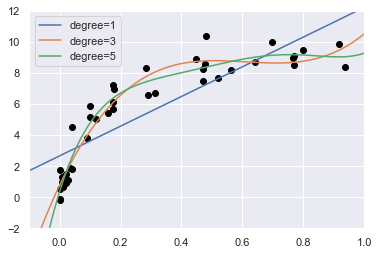

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, np.newaxis] 
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model omplexity in this caes is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: wheat degree of polynomial provides a suitable trade-off between bias (under-fittin) and variance (over-fitting)?

We can make progress ins this by visualizing the validatio ncurve for this particular data and model; this can be done straightforwardly using the `validation_curve` convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validatio score across the range:

d:\python-datascience-handbook\.env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


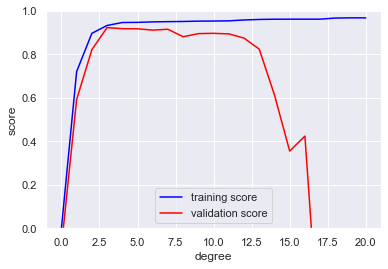

In [27]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisley the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity, and the validation score reaches a maximum before dropping off as the model becomes over-fit.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:

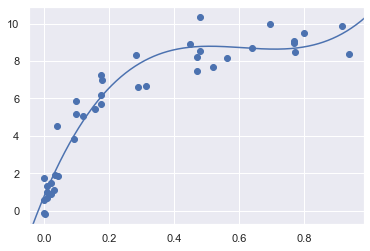

In [29]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Notice that finding this optimal model did not actually requiere us to compute the training score, but examinign the relationship between the training score and validatio score cangive us useful insight into the performance of the model